## CHURN-Analyse von Kunden - Ziel: Abwanderungsgründe von Kunden verstehen und Gegenmaßnahmen einleiten

In [54]:
#Churn-Analysis

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#1.load training data
df=pd.read_csv(r"C:\Users\goex1\Desktop\DS Projekte für GITHUB\Churn\customer_churn_dataset-training-master.csv")

#2.descriptive statistics
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [55]:


df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


<Axes: xlabel='Churn', ylabel='percent'>

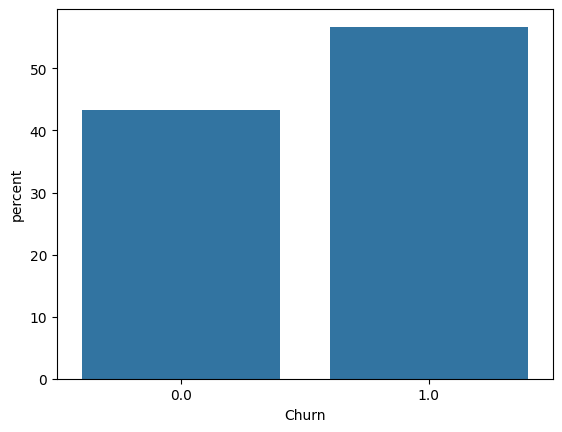

In [66]:
#Balkendiagramm der Zielvariablen 

sns.countplot(df,x='Churn',stat='percent')

In [68]:

#Zielvariable Churn umkodieren von 0 und 1 zu "nein" und "ja"

df["Churn_categoric"] = df["Churn"].replace({0: "nein", 1: "ja"})

#In metrische und kategorische Variablen einteilen:
metric_features=['Age','Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
categoric_features=['Gender', 'Subscription Type', 'Contract Length', 'Churn_categoric']


Text(0.5, 0, 'Churn')

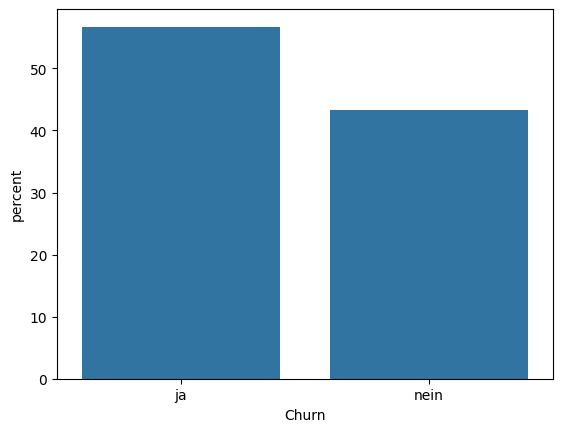

In [63]:
sns.countplot(df,x='Churn_categoric',stat='percent')
plt.xlabel("Churn")

c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


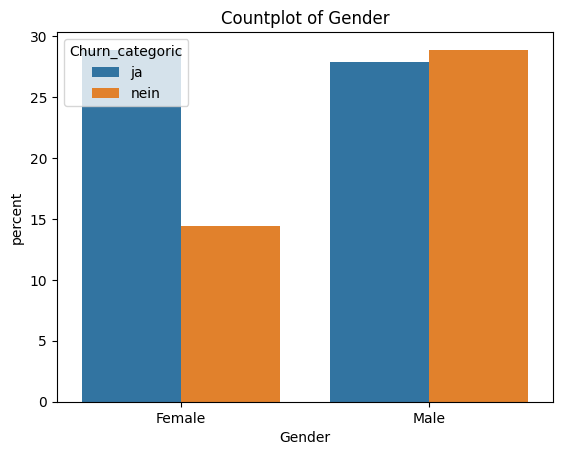

c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


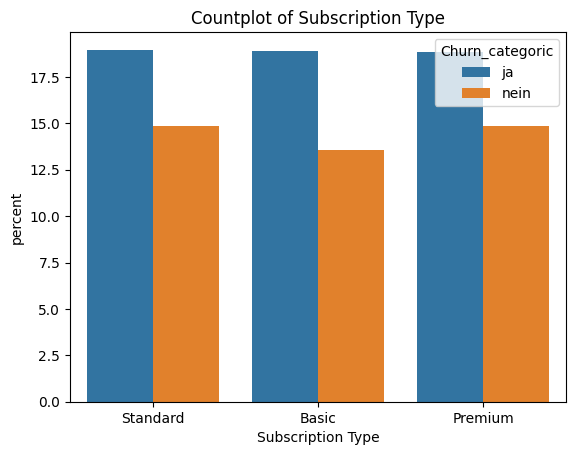

c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


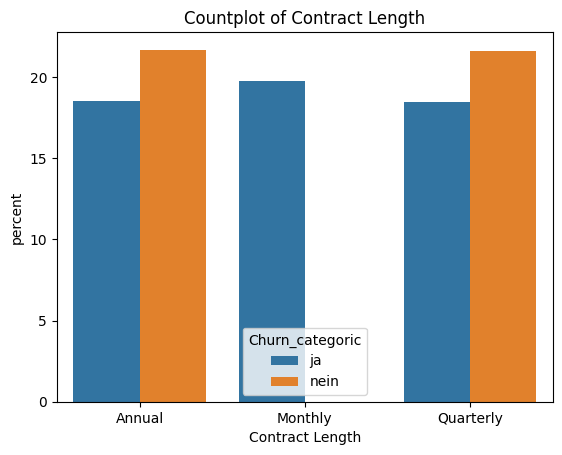

c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


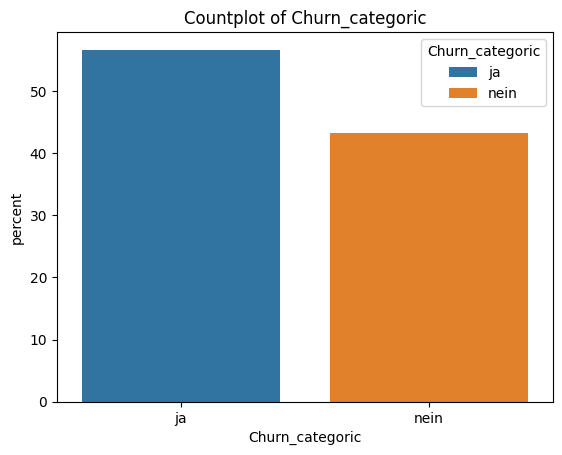

In [69]:
#Kategorische Variablen unterteilen nach Churn

for feature in categoric_features:
    plt.figure()
    sns.countplot(df,x=feature,stat='percent', hue='Churn_categoric')
    plt.title(f'Countplot of {feature}')
    plt.show()

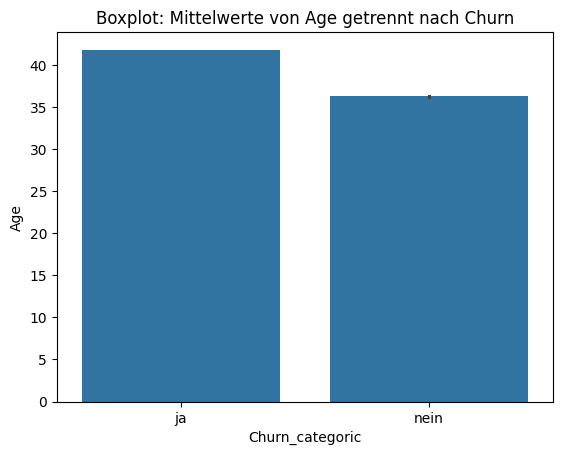

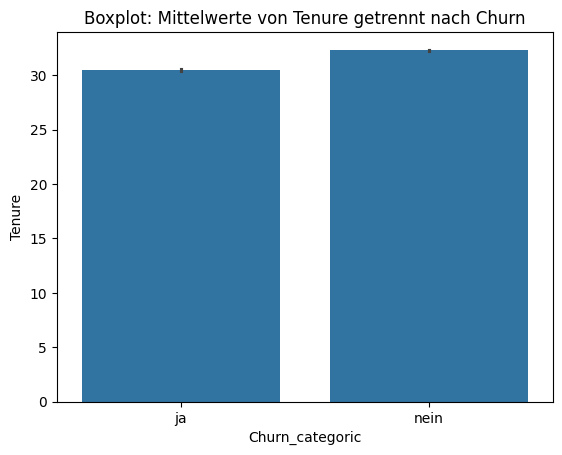

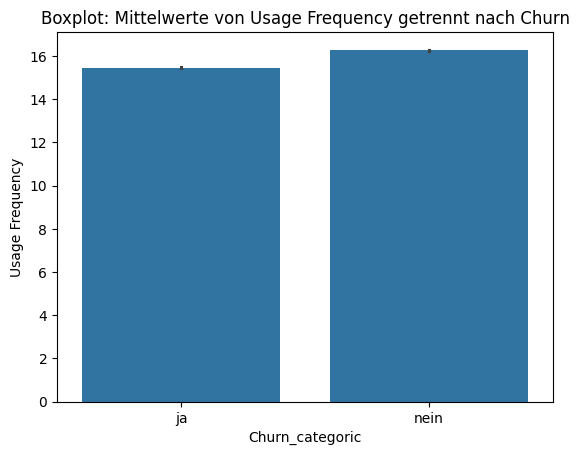

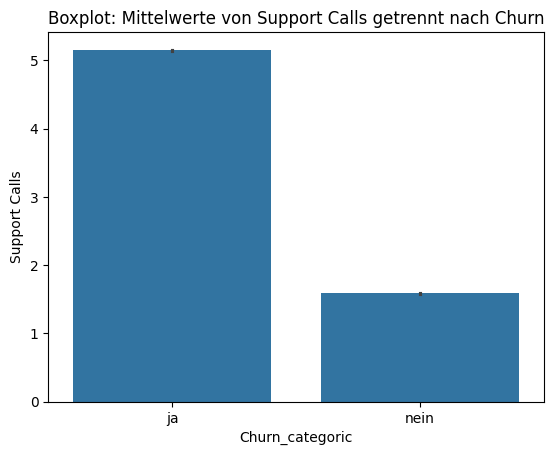

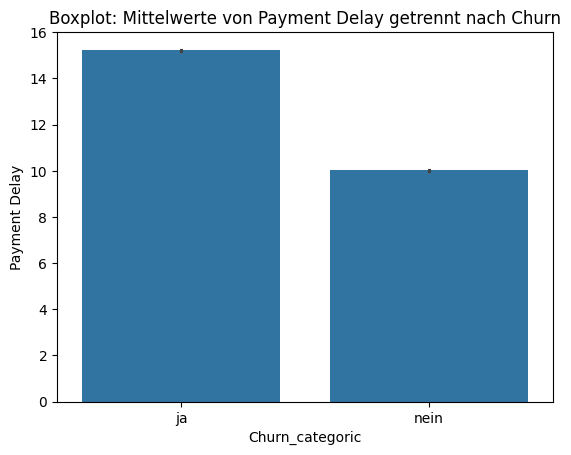

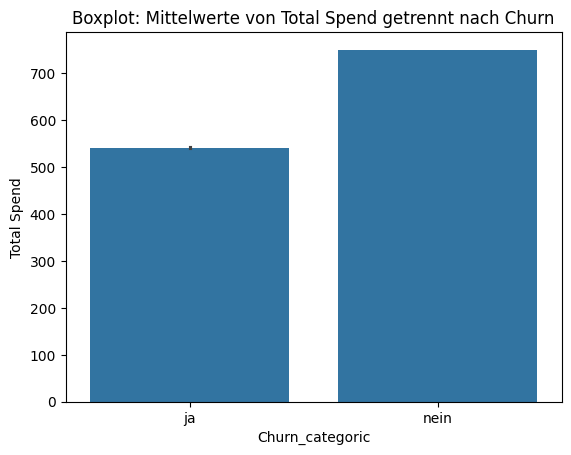

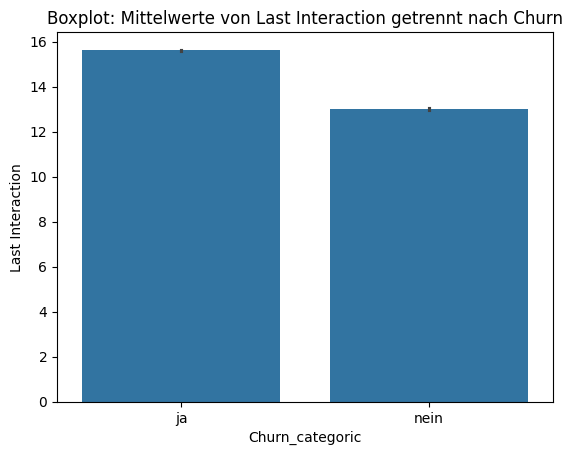

In [ ]:
#Boxplots mit Mittelwerten getrennt nach Churn - Bei welchen Features gibt es größere Unterschiede?

for feature in metric_features:
    plt.figure()
    sns.barplot(data=df, y=feature,x='Churn_categoric')
    plt.title(f'Boxplot: Mittelwerte von {feature} getrennt nach Churn')
    plt.show()


### Deskriptives Zwischenfazit:

#### Die Kunden, die abwandern (churn=ja) im Vergleich zu den Kunden,die nicht abwandern (churn=nein):
#### Sind prozentual betrachtet häufiger weiblich (feature: gender),
#### haben häufig eine monatliche Vetragslaufzeit gewählt (feature: Contract Length), 
#### sind im Durchschnitt älter (feature: Age),
#### haben im Durchschnitt deutlich mehr Support Calls (feature: support call) getätigt,
#### haben im Durchschnitt häufiger Zahlungsschwierigkeiten (feature: Payment delay),
#### haben im Durchschnitt einen niedrigeren Kaufpreis bezahlt (feature: Total Spend) und
#### letzte Interaktion mit dem erworbenen Produkt liegt länger zurück (feature: Last Interaction)

In [ ]:
#Testdatensatz laden

df_test=pd.read_csv(r"c:\Users\goex1\Desktop\DS Projekte für GITHUB\Churn\customer_churn_dataset-testing-master.csv")
df_test.describe()



,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
#Feature Engineering Testdatensatz


metric_features_test = ['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']

#Modell- Features und Y
X_train=df[metric_features]
y_train=df['Churn']

X_test=df_test[metric_features_test]
y_test=df_test['Churn']




In [ ]:

X_train[metric_features].dtypes
X_test[metric_features_test].dtypes


Age                 int64
Tenure              int64
Usage Frequency     int64
Support Calls       int64
Payment Delay       int64
Total Spend         int64
Last Interaction    int64
dtype: object

In [ ]:




print(X_train.isna().sum())
print(X_test.isna().sum())



Age                 1
Tenure              1
Usage Frequency     1
Support Calls       1
Payment Delay       1
Total Spend         1
Last Interaction    1
dtype: int64
Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
dtype: int64


In [ ]:
print((y_train).isna().sum())
print((y_test).isna().sum())

1
0


In [ ]:

# Maske erstellen: nur Zeilen behalten, die keine NaNs in X_train oder y_train haben
mask = ~np.isnan(X_train).any(axis=1) & y_train.notna()

# Bereinigte Trainingsdaten
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]


In [ ]:
from sklearn.linear_model import LogisticRegression

logisreg= LogisticRegression(class_weight='balanced',max_iter=1000)

logisreg.fit(X_train_clean,y_train_clean)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [70]:
predictions=logisreg.predict(X_test)


#Churn Prediction und Churn Probability in Testdatensatz speichern
df_test['Churn_Prediction'] = predictions

df_test['Churn_Probability'] = logisreg.predict_proba(X_test)[:, 1]

In [ ]:
df_test.head(35)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Churn_Prediction,Churn_Probability
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,1.0,0.868515
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,1.0,0.968876
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,1.0,0.765927
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,1.0,0.988743
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,1.0,0.984044
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0,1.0,0.996781
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1,1.0,0.998443
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0,1.0,0.737276
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0,1.0,0.984116
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0,0.0,0.407045


In [ ]:

# DataFrame zur besseren Übersicht
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
})

print(feature_importance.sort_values(by='Coefficient',ascending=False))


            Feature  Coefficient
3     Support Calls     0.683760
4     Payment Delay     0.102385
6  Last Interaction     0.039700
0               Age     0.032738
5       Total Spend    -0.005492
1            Tenure    -0.006780
2   Usage Frequency    -0.013064


### Klassifikationsbericht

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)


[[ 9104 24777]
 [  938 29555]]


In [74]:

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.91      0.27      0.41     33881
           1       0.54      0.97      0.70     30493

    accuracy                           0.60     64374
   macro avg       0.73      0.62      0.56     64374
weighted avg       0.73      0.60      0.55     64374



## Fazit:
## Die wichtigsten Features um Churn vorherzusagen sind die features Support Calls und Payment Delay. Die beiden Faktoren haben den größten Einfluss auf die Abwanderung von Kunden (Churn=1). 

## Empfehlung an das Management: Für die Kunden, die häufig Support Calls getätigt haben und häufig Payment Delay hatten, besondere Maßnahmen zur Kundenbindung einleiten, um ein Churn zu verhindern.